<a href="https://colab.research.google.com/github/swathypt/ML_Project_Intrusion_Detection_Systems/blob/main/ML_Project_Intrusion_Detection_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 #**Machine Learning Project**
#Intrusion detection system using NSL KDD Cup data

##1.INSTALLING PACKAGES

### PIP install

In [1]:
!pip install pycaret -q

     |████████████████████████████████| 264 kB 7.2 MB/s 
     |████████████████████████████████| 14.4 MB 63 kB/s 
     |████████████████████████████████| 248 kB 63.3 MB/s 
     |████████████████████████████████| 56 kB 5.7 MB/s 
     |████████████████████████████████| 105 kB 73.7 MB/s 
     |████████████████████████████████| 271 kB 61.0 MB/s 
     |████████████████████████████████| 6.8 MB 60.8 MB/s 
     |████████████████████████████████| 80 kB 12.1 MB/s 
     |████████████████████████████████| 167 kB 66.6 MB/s 
     |████████████████████████████████| 2.0 MB 59.3 MB/s 
     |████████████████████████████████| 1.3 MB 59.0 MB/s 
     |████████████████████████████████| 1.7 MB 57.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 636 kB 55.6 MB/s 
     |████████████████████████████████| 102 kB 66.6 MB/s 
     |██████████████████

In [2]:
!pip install pandas-profiling==2.8.0  -q

     |████████████████████████████████| 259 kB 8.4 MB/s 
     |████████████████████████████████| 59 kB 7.9 MB/s 


In [3]:
#EDA library
!pip install AutoViz -q

     |████████████████████████████████| 44 kB 1.8 MB/s 


###Importing required packages


In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas_profiling


In [5]:
from IPython.display import SVG
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.83. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


##*2. DATA COLLECTION*




### *Dataset Description* 

NSL-KDD data set is an effective benchmark for researchers to compare different types of Intrusion detection system (IDS) methods, build an Intrusion detection system ( Host based or Network based), doing for some experiments in Cyber security area like wise there is so many advantages. 

### *Task Objective* 

Build a network intrusion detector, a predictive model capable of distinguishing between bad connections, called intrusions or attacks, and good normal connections. 

### *Obtaining data and connecting it to colab*

In [6]:
train_data = pd.read_csv('https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain%2B.csv')
train_data.columns = range(train_data.shape[1])
train_data.shape

(125972, 43)

In [7]:
#Datasets have no headers.Add them manually
column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level']# subclass - > attack_type

#Add these column names to dataset
train_data.columns=column_names


### Add or modify columns as required 

Map normal to 0 and all other attacks to 1 add as column

In [8]:
is_attack_train = train_data.attack_type.map(lambda a: 0 if a == 'normal' else 1)

train_data['attack_flag'] = is_attack_train
# view the result
train_data.head()

duration protocol_type  service  ... attack_type  difficulty_level  attack_flag
0         0           udp    other  ...      normal                15            0
1         0           tcp  private  ...     neptune                19            1
2         0           tcp     http  ...      normal                21            0
3         0           tcp     http  ...      normal                21            0
4         0           tcp  private  ...     neptune                21            1

[5 rows x 44 columns]

In [9]:
# lists to hold our attack classifications
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

# we will use these for plotting below
attack_labels = ['Normal','DoS','Probe','Privilege','Access']

In [10]:
def map_attack(attack):
  if attack in dos_attacks:
    # dos_attacks map to 1
    attack_type = 1
  elif attack in probe_attacks:
    # probe_attacks mapt to 2
    attack_type = 2
  elif attack in privilege_attacks:
    # privilege escalation attacks map to 3
    attack_type = 3
  elif attack in access_attacks:
    # remote access attacks map to 4
    attack_type = 4
  else:
    # normal maps to 0
    attack_type = 0
  return attack_type


In [11]:
# map the data and join to the data set
train_attack_map = train_data.attack_type.apply(map_attack)
train_data['attack_map'] = train_attack_map

In [12]:
target_name="attack_flag"

## *3. EXPLORATORY DATA ANALYSIS(EDA)*

In [14]:
pandas_profiling.ProfileReport(train_data,minimal=True)

Summarize dataset:   0%|          | 0/54 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
corr_matrix = train_data.corr()
corr_matrix["attack_flag"].sort_values(ascending=False)

attack_flag                    1.000000
attack_map                     0.861127
dst_host_srv_serror_rate       0.654984
dst_host_serror_rate           0.651840
serror_rate                    0.650651
srv_serror_rate                0.648287
count                          0.576442
dst_host_count                 0.375051
srv_rerror_rate                0.253502
dst_host_srv_rerror_rate       0.253428
rerror_rate                    0.253395
dst_host_rerror_rate           0.252562
dst_host_diff_srv_rate         0.242897
diff_srv_rate                  0.203658
wrong_fragment                 0.095905
dst_host_same_src_port_rate    0.092445
dst_host_srv_diff_host_rate    0.062330
duration                       0.048785
land                           0.007191
src_bytes                      0.005921
dst_bytes                      0.004118
srv_count                      0.000768
is_host_login                 -0.002629
urgent                        -0.002787
num_failed_logins             -0.003755


In [16]:
attack_vs_protocol = pd.crosstab(train_data.attack_type, train_data.protocol_type)
attack_vs_protocol

protocol_type    icmp    tcp    udp
attack_type                        
back                0    956      0
buffer_overflow     0     30      0
ftp_write           0      8      0
guess_passwd        0     53      0
imap                0     11      0
ipsweep          3117    482      0
land                0     18      0
loadmodule          0      9      0
multihop            0      7      0
neptune             0  41214      0
nmap              981    265    247
normal           1309  53599  12434
perl                0      3      0
phf                 0      4      0
pod               201      0      0
portsweep           5   2926      0
rootkit             0      7      3
satan              32   2184   1417
smurf            2646      0      0
spy                 0      2      0
teardrop            0      0    892
warezclient         0    890      0
warezmaster         0     20      0

Shape of your Data Set loaded: (125972, 45)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  15
    Number of Integer-Categorical Columns =  19
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  5
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  1
    44 Predictors classified...
        This does not include the Target column(s)
        3 variables removed since they were ID or low-information variables
    List of variables removed: ['num_outbound_cmds', 'service', 'attack_type']

################ Binary_Classification VISUALIZATION Started #####################
Number of variables = 41 exceeds limit, finding top 30 variables through 

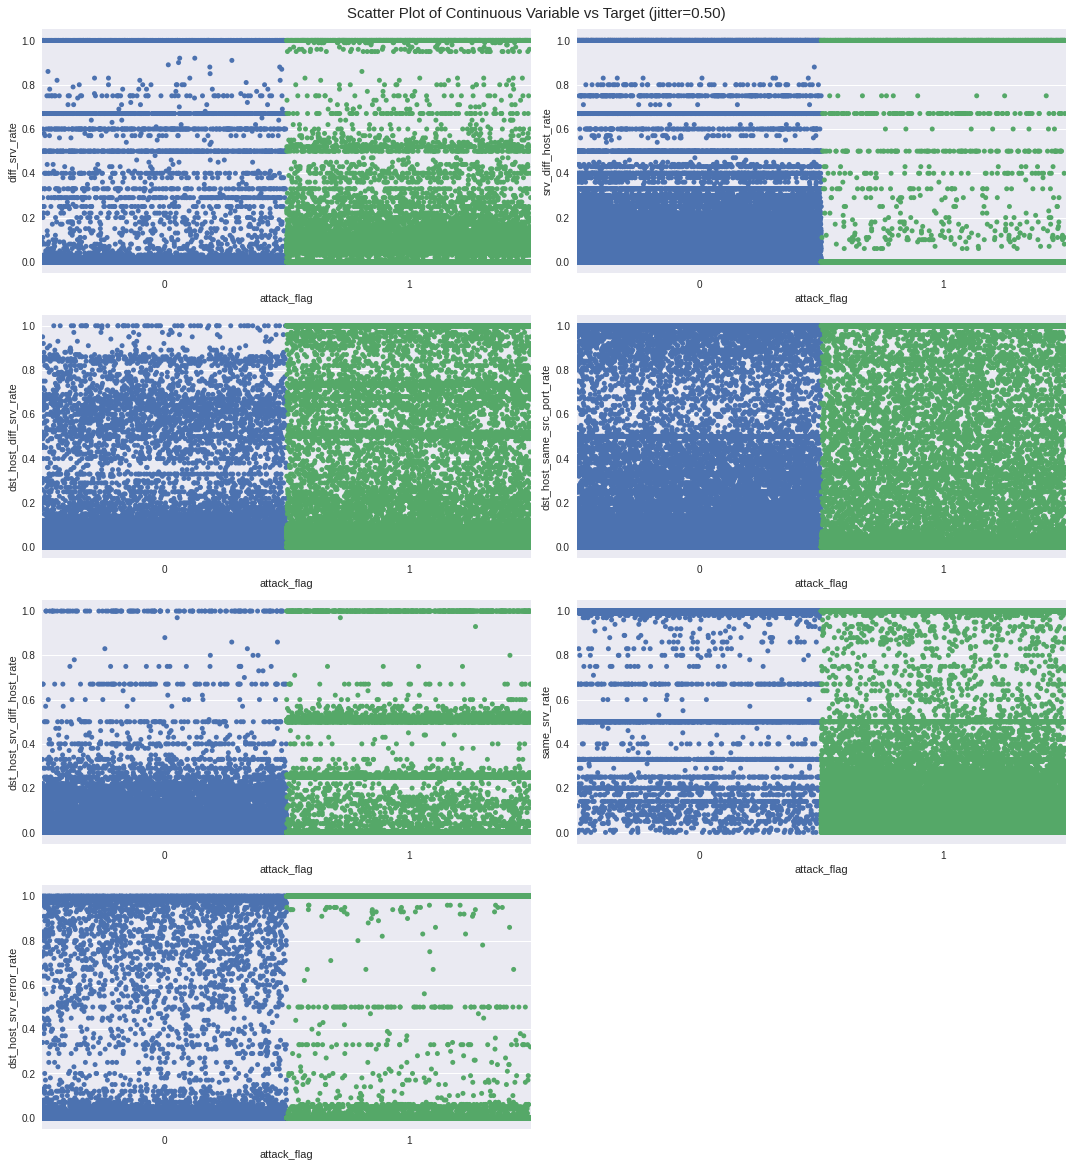

Total Number of Scatter Plots = 28


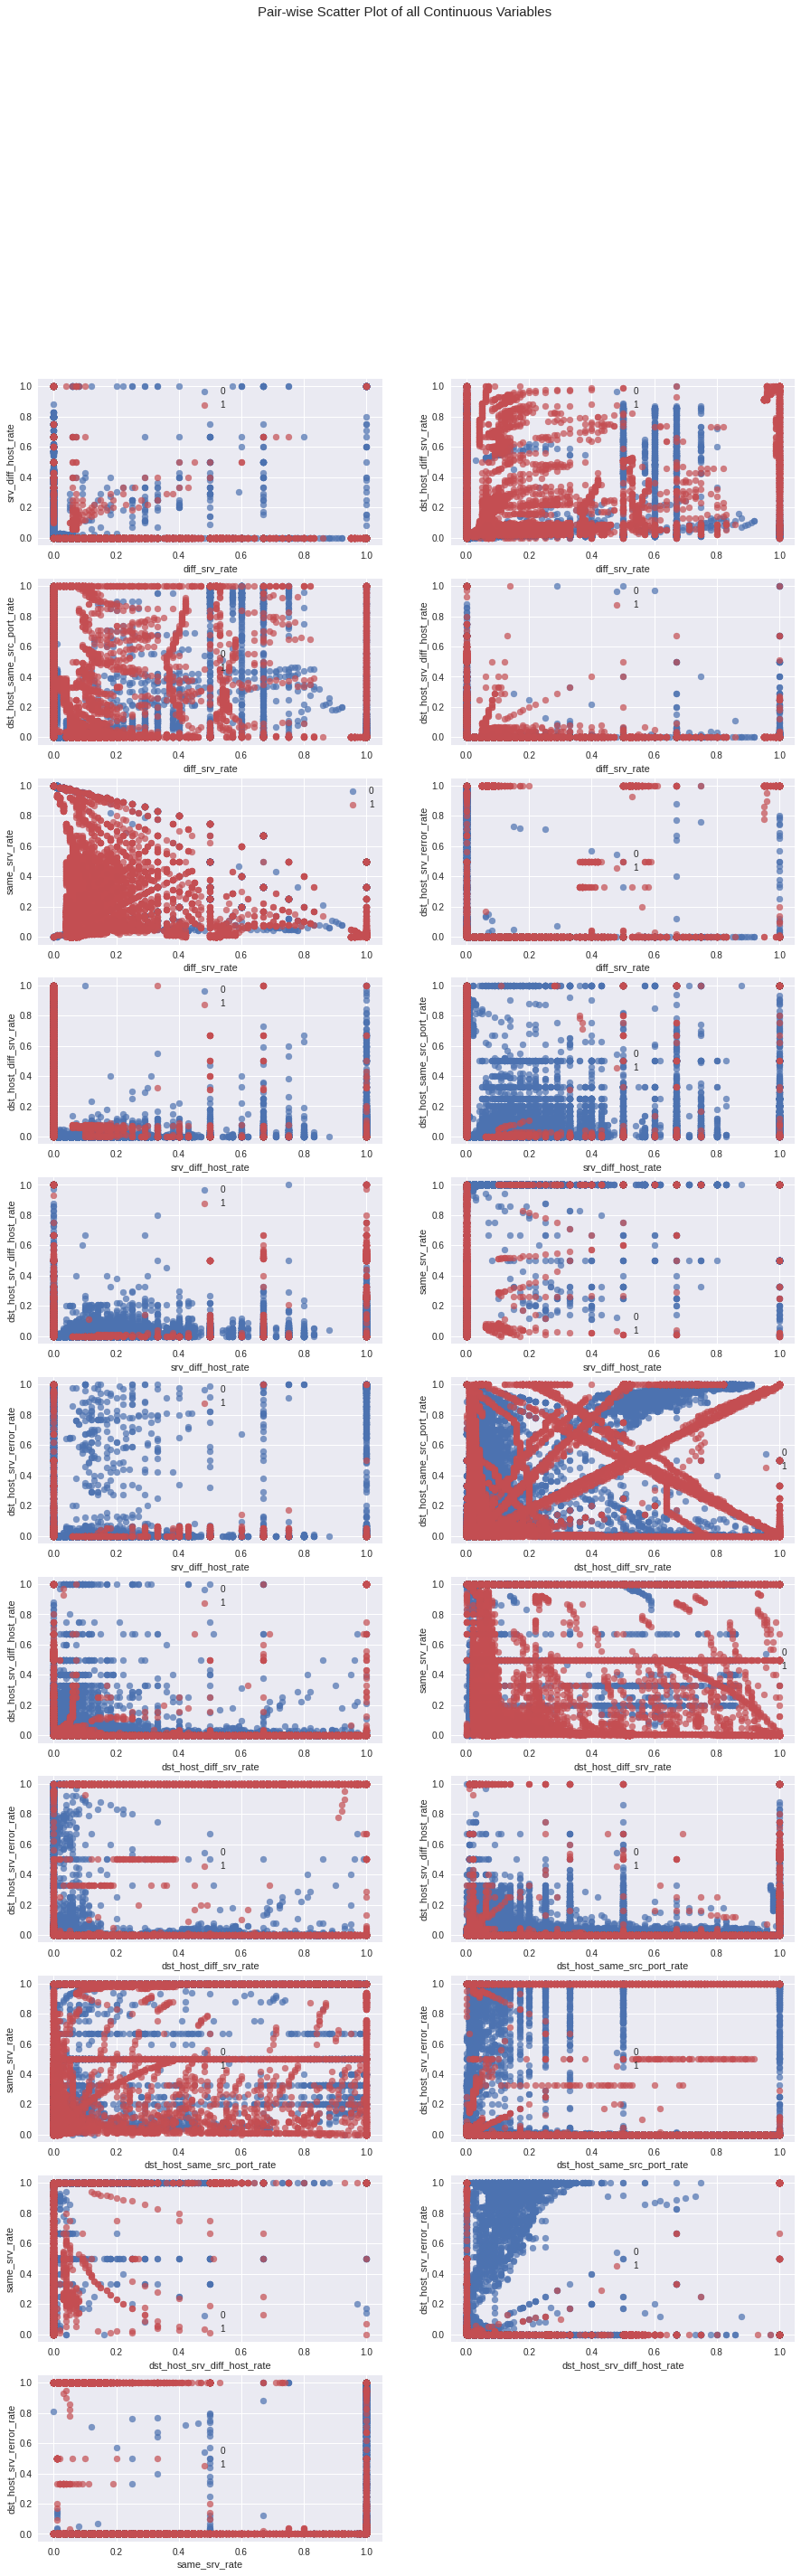

In [ ]:
AV.AutoViz(filename="", sep=',', depVar=target_name, dfte=train_data, header=1, verbose=1,chart_format="svg")

In [ ]:
corr = trained_data.corr()

plt.figure(figsize=(25,22))

sns.heatmap(corr,annot=True,cmap="rainbow")

plt.show()

### EDA Report

**1.  Missing values -ESPECIALLY for Y(target) column**

NIL

**2. Duplicate rows**

NIL

**3. Data types of columns, also ordinal features**   


**4. - Perfect_collinearity (100 %colinear problem solving) and multi colinearity**


**5. - Skewness and Kurtosis**

bad skewness present in 'src_bytes','dst_bytes','num_failed_logins','num_compromised','num_root','num_file_creations','num_access_files'

**6. - Scale of column range**

scaling is required

**7. - Extreme values or outliers**

**8. - Low variance Columns**

**9. - Balance in count between target column categories**

**10. - Ignore features- id columns ,unique name,serial number etc. pass list of column names in a list to remove them from training**


**11. - High cardinality -categorical columns which have category items count more than 10-20 or more**


service has a high cardinality: 70 distinct values	
(Column removed)


**12. - Central tendency values**


**13. - Count of rows and columns**


## *4. DATA PRE-PROCESSING*

Drop multicolinear columns

In [ ]:
train_data.drop('num_file_creations',axis = 1,inplace= True)
train_data.drop('num_access_files',axis = 1,inplace= True)
train_data.drop('num_failed_logins',axis = 1,inplace= True)
train_data.drop('num_root',axis = 1,inplace= True)
train_data.drop('num_compromised',axis = 1,inplace= True)
train_data.drop('hot',axis = 1,inplace= True)
train_data.drop('attack_type',axis = 1,inplace= True)
train_data.drop('attack_map',axis = 1,inplace= True)

In [ ]:
test_data.to_csv("unseen_data.csv",index_label=False)

In [ ]:
train_data.reset_index(drop=True)#resetting index of data variable

duration protocol_type  ... difficulty_level attack_flag
0              0           udp  ...               15           0
1              0           tcp  ...               19           1
2              0           tcp  ...               21           0
3              0           tcp  ...               21           0
4              0           tcp  ...               21           1
...          ...           ...  ...              ...         ...
125967         0           tcp  ...               20           1
125968         8           udp  ...               21           0
125969         0           tcp  ...               18           0
125970         0           tcp  ...               20           1
125971         0           tcp  ...               21           0

[125972 rows x 37 columns]

Check for Null Values in the dataset

In [ ]:
combined_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### Data preprocessed for Machine learning

In [ ]:
train_data.describe(include="object")

protocol_type service    flag
count         125972  125972  125972
unique             3      70      11
top              tcp    http      SF
freq          102688   40338   74944

In [ ]:
from pycaret.classification import setup

In [ ]:
from pycaret.classification import get_config,set_config

In [ ]:
from sklearn import set_config as sg
sg(display="diagram")

In [ ]:
preprocessed_data =setup(data = train_data,
                         target = 'attack_flag',
                         fix_imbalance=True,
                         session_id=123,
                         normalize=True,
                         transformation=True,
                         remove_multicollinearity=True,
                         remove_outliers=True,
                         categorical_imputation="mode",
                         categorical_features=["protocol_type","flag"],
                         combine_rare_levels=True,
                         feature_selection=True,
                         ignore_low_variance=True,
                         data_split_stratify=True,
                         silent=True,
                         use_gpu=True,
                         experiment_name='intrusion_detection')

Description                Value
0                               session_id                  123
1                                   Target          attack_flag
2                              Target Type               Binary
3                            Label Encoded           0: 0, 1: 1
4                            Original Data         (125972, 37)
5                           Missing Values                False
6                         Numeric Features                   23
7                     Categorical Features                   13
8                         Ordinal Features                False
9                High Cardinality Features                False
10                 High Cardinality Method                 None
11                   Transformed Train Set          (83771, 63)
12                    Transformed Test Set          (37792, 63)
13                      Shuffle Train-Test                 True
14                     Stratify Train-Test                 True
15                          Fold Generator      StratifiedKFold
16                             Fold Number                   10
17                                CPU Jobs                   -1
18                                 Use GPU                 True
19                          Log Experiment                False
20                         Experiment Name  intrusion_detection
21                                     USI                 5af9
22                         Imputation Type               simple
23          Iterative Imputation Iteration                 None
24                         Numeric Imputer                 mean
25      Iterative Imputation Numeric Model                 None
26                     Categorical Imputer                 mode
27  Iterative Imputation Categorical Model                 None
28           Unknown Categoricals Handling       least_frequent
29                               Normalize                 True
30                        Normalize Method               zscore
31                          Transformation                 True
32                   Transformation Method          yeo-johnson
33                                     PCA                False
34                              PCA Method                 None
35                          PCA Components                 None
36                     Ignore Low Variance                 True
37                     Combine Rare Levels                 True
38                    Rare Level Threshold                  0.1
39                         Numeric Binning                False
40                         Remove Outliers                 True
41                      Outliers Threshold                 0.05
42                Remove Multicollinearity                 True
43             Multicollinearity Threshold                  0.9
44             Remove Perfect Collinearity                 True
45                              Clustering                False
46                    Clustering Iteration                 None
47                     Polynomial Features                False
48                       Polynomial Degree                 None
49                    Trignometry Features                False
50                    Polynomial Threshold                 None
51                          Group Features                False
52                       Feature Selection                 True
53                Feature Selection Method              classic
54            Features Selection Threshold                  0.8
55                     Feature Interaction                False
56                           Feature Ratio                False
57                   Interaction Threshold                 None
58                           Fix Imbalance                 True
59                    Fix Imbalance Method                SMOTE

- X: Transformed dataset (X)
- y: Transformed dataset (y)  
- X_train: Transformed train dataset (X)
- X_test: Transformed test/holdout dataset (X)
- y_train: Transformed train dataset (y)
- y_test: Transformed test/holdout dataset (y)
- seed: random state set through session_id
- prep_pipe: Transformation pipeline

In [ ]:
preprocessed_data

(5,
 True,
 None,
 {'auc': 'AUC',
  'boundary': 'Decision Boundary',
  'calibration': 'Calibration Curve',
  'class_report': 'Class Report',
  'confusion_matrix': 'Confusion Matrix',
  'dimension': 'Dimensions',
  'error': 'Prediction Error',
  'feature': 'Feature Importance',
  'feature_all': 'Feature Importance (All)',
  'gain': 'Gain Chart',
  'ks': 'KS Statistic Plot',
  'learning': 'Learning Curve',
  'lift': 'Lift Chart',
  'manifold': 'Manifold Learning',
  'parameter': 'Hyperparameters',
  'pr': 'Precision Recall',
  'rfe': 'Feature Selection',
  'threshold': 'Threshold',
  'tree': 'Decision Tree',
  'vc': 'Validation Curve'},
 False,
 True,
 False,
 False,
 '5af9',
 True,
 10,
 33810     0
 47653     0
 16995     0
 104161    0
 72295     0
          ..
 7348      0
 13023     0
 61945     0
 101140    0
 81276     1
 Name: attack_flag, Length: 83771, dtype: int64,
 Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['

In [ ]:
get_config("X")

service_csnet_ns  service_link  ...  service_telnet  service_echo
0                    0.0           0.0  ...             0.0           0.0
1                    0.0           0.0  ...             0.0           0.0
2                    0.0           0.0  ...             0.0           0.0
3                    0.0           0.0  ...             0.0           0.0
4                    0.0           0.0  ...             0.0           0.0
...                  ...           ...  ...             ...           ...
125967               0.0           0.0  ...             0.0           0.0
125968               0.0           0.0  ...             0.0           0.0
125969               0.0           0.0  ...             0.0           0.0
125970               0.0           0.0  ...             0.0           0.0
125971               0.0           0.0  ...             0.0           0.0

[125972 rows x 63 columns]

In [ ]:
get_config("y")

0         0
1         1
2         0
3         0
4         1
         ..
125967    1
125968    0
125969    0
125970    1
125971    0
Name: attack_flag, Length: 125972, dtype: int64

In [ ]:
get_config("X_train")

service_csnet_ns  service_link  ...  service_telnet  service_echo
33810                0.0           0.0  ...             0.0           0.0
47653                0.0           0.0  ...             0.0           0.0
16995                0.0           0.0  ...             0.0           0.0
104161               0.0           0.0  ...             0.0           0.0
72295                0.0           0.0  ...             0.0           0.0
...                  ...           ...  ...             ...           ...
7348                 0.0           0.0  ...             0.0           0.0
13023                0.0           0.0  ...             0.0           0.0
61945                0.0           0.0  ...             0.0           0.0
101140               0.0           0.0  ...             0.0           0.0
81276                0.0           0.0  ...             0.0           0.0

[83771 rows x 63 columns]

In [ ]:
get_config("y_train")

33810     0
47653     0
16995     0
104161    0
72295     0
         ..
7348      0
13023     0
61945     0
101140    0
81276     1
Name: attack_flag, Length: 83771, dtype: int64

In [ ]:
get_config("X_test")

service_csnet_ns  service_link  ...  service_telnet  service_echo
25792                0.0           0.0  ...             0.0           0.0
4791                 0.0           0.0  ...             0.0           0.0
39969                0.0           0.0  ...             0.0           0.0
1764                 0.0           0.0  ...             0.0           0.0
48439                0.0           0.0  ...             0.0           0.0
...                  ...           ...  ...             ...           ...
113743               0.0           0.0  ...             0.0           0.0
94262                0.0           0.0  ...             0.0           0.0
75067                0.0           0.0  ...             0.0           0.0
93650                0.0           0.0  ...             0.0           0.0
87405                0.0           0.0  ...             0.0           0.0

[37792 rows x 63 columns]

In [ ]:
get_config("y_test")

25792     0
4791      1
39969     1
1764      0
48439     0
         ..
113743    0
94262     1
75067     1
93650     1
87405     0
Name: attack_flag, Length: 37792, dtype: int64

In [ ]:
get_config("prep_pipe")

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['protocol_type',
                                                            'flag'],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='attack_flag', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_n...
                 Advanced_Feature_Selection_Classic(ml_usecase='classification',
                                                    n_jobs=-1, random_state=123,
                                                    subclass='binary',
                                                    target='attack_flag',
                                                    top_features_to_pick=0.19999999999999996)),
                ('fix_multi',
                 Fix_multicollinearity(correlation_with_target_preference=None,
                                       correlation_with_target_threshold=0.0,
                                       target_variable='attack_flag',
                                       threshold=0.9)),
                ('dfs', 'passthrough'), ('pca', 'passthrough')],
         verbose=False)

In [ ]:
temp_X_train=get_config("X_train")
temp_y_train=get_config("y_train")

In [ ]:
temp_X_train

service_csnet_ns  service_link  ...  service_telnet  service_echo
33810                0.0           0.0  ...             0.0           0.0
47653                0.0           0.0  ...             0.0           0.0
16995                0.0           0.0  ...             0.0           0.0
104161               0.0           0.0  ...             0.0           0.0
72295                0.0           0.0  ...             0.0           0.0
...                  ...           ...  ...             ...           ...
7348                 0.0           0.0  ...             0.0           0.0
13023                0.0           0.0  ...             0.0           0.0
61945                0.0           0.0  ...             0.0           0.0
101140               0.0           0.0  ...             0.0           0.0
81276                0.0           0.0  ...             0.0           0.0

[83771 rows x 63 columns]

In [ ]:
temp_y_train

33810     0
47653     0
16995     0
104161    0
72295     0
         ..
7348      0
13023     0
61945     0
101140    0
81276     1
Name: attack_flag, Length: 83771, dtype: int64

In [ ]:
temp_y_train.value_counts()

0    46342
1    37429
Name: attack_flag, dtype: int64

In [ ]:
!pip install umap-learn pandas matplotlib datashader bokeh holoviews scikit-image colorcet

     |████████████████████████████████| 15.8 MB 602 bytes/s 
     |████████████████████████████████| 76 kB 5.7 MB/s 
     |████████████████████████████████| 118 kB 61.2 MB/s 
     |████████████████████████████████| 1.0 MB 41.8 MB/s 
     |████████████████████████████████| 722 kB 33.4 MB/s 
     |████████████████████████████████| 722 kB 50.7 MB/s 
     |████████████████████████████████| 715 kB 57.4 MB/s 
     |████████████████████████████████| 705 kB 66.2 MB/s 
     |████████████████████████████████| 699 kB 55.8 MB/s 
     |████████████████████████████████| 696 kB 59.6 MB/s 
     |████████████████████████████████| 684 kB 57.9 MB/s 
     |████████████████████████████████| 679 kB 58.7 MB/s 
     |████████████████████████████████| 675 kB 64.7 MB/s 
     |████████████████████████████████| 675 kB 59.9 MB/s 
     |████████████████████████████████| 672 kB 44.0 MB/s 
     |████████████████████████████████| 671 kB 59.4 MB/s 
     |████████████████████████████████| 669 kB 60.4 MB/s 
     |███████

###Final UMAP

In [ ]:
from pycaret.classification import compare_models,create_model,tune_model,finalize_model,save_model,predict_model,load_model

In [ ]:
from pycaret.classification import plot_model

In [ ]:
from pycaret.classification import remove_metric
remove_metric("Kappa")
remove_metric("MCC")

Ml model comparison study

In [ ]:
compare_models(include=['lr', 'knn', 'nb', 'dt', 'svm', 'rf'],cross_validation=False,sort="AUC")

Model  Accuracy     AUC  Recall   Prec.      F1  \
rf   Random Forest Classifier    0.9991  1.0000  0.9999  0.9982  0.9990   
knn    K Neighbors Classifier    0.9966  0.9989  0.9985  0.9943  0.9964   
dt   Decision Tree Classifier    0.9989  0.9989  0.9996  0.9980  0.9988   
lr        Logistic Regression    0.9799  0.9966  0.9899  0.9677  0.9787   
nb                Naive Bayes    0.6806  0.9822  0.3190  0.9839  0.4818   
svm       SVM - Linear Kernel    0.9786  0.9795  0.9920  0.9632  0.9774   

     TT (Sec)  
rf      30.74  
knn     28.02  
dt      26.48  
lr      32.05  
nb      26.68  
svm     26.84

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [ ]:
best_models=compare_models(include=['lr', 'knn', 'nb', 'dt', 'svm','rf'],n_select=3,sort="AUC")

Model  Accuracy     AUC  Recall   Prec.      F1  \
rf   Random Forest Classifier    0.9996  1.0000  0.9996  0.9995  0.9996   
knn    K Neighbors Classifier    0.9977  0.9994  0.9977  0.9972  0.9974   
dt   Decision Tree Classifier    0.9989  0.9989  0.9990  0.9985  0.9987   
lr        Logistic Regression    0.9849  0.9983  0.9896  0.9770  0.9833   
nb                Naive Bayes    0.6986  0.9839  0.3280  0.9925  0.4930   
svm       SVM - Linear Kernel    0.9833  0.0000  0.9909  0.9724  0.9815   

     TT (Sec)  
rf     27.309  
knn    30.507  
dt     22.925  
lr     27.339  
nb     22.492  
svm    22.947

In [ ]:
best_models

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                        warm_start=False),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        mi

In [ ]:
best_models[0]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [ ]:
get_config("prep_pipe")

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['protocol_type',
                                                            'flag'],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='attack_flag', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_n...
                 Advanced_Feature_Selection_Classic(ml_usecase='classification',
                                                    n_jobs=-1, random_state=123,
                                                    subclass='binary',
                                                    target='attack_flag',
                                                    top_features_to_pick=0.19999999999999996)),
                ('fix_multi',
                 Fix_multicollinearity(correlation_with_target_preference=None,
                                       correlation_with_target_threshold=0.0,
                                       target_variable='attack_flag',
                                       threshold=0.9)),
                ('dfs', 'passthrough'), ('pca', 'passthrough')],
         verbose=False)

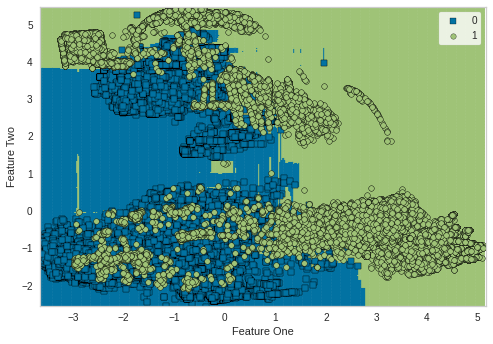

In [ ]:
plot_model(best_models[0],"boundary",use_train_data=True)

In [ ]:
tuned_model_0 = tune_model(best_models[0],optimize="F1",early_stopping=True,choose_better=True,tuner_verbose=True)

Accuracy     AUC  Recall   Prec.      F1
0       0.9925  0.9991  0.9963  0.9870  0.9916
1       0.9927  0.9988  0.9973  0.9865  0.9919
2       0.9939  0.9991  0.9971  0.9894  0.9932
3       0.9924  0.9989  0.9992  0.9840  0.9915
4       0.9928  0.9992  0.9995  0.9847  0.9920
5       0.9928  0.9992  0.9981  0.9860  0.9920
6       0.9908  0.9984  0.9968  0.9829  0.9898
7       0.9925  0.9990  0.9995  0.9840  0.9917
8       0.9915  0.9986  0.9973  0.9839  0.9906
9       0.9919  0.9985  0.9984  0.9837  0.9910
Mean    0.9924  0.9989  0.9979  0.9852  0.9915
SD      0.0008  0.0003  0.0011  0.0019  0.0009

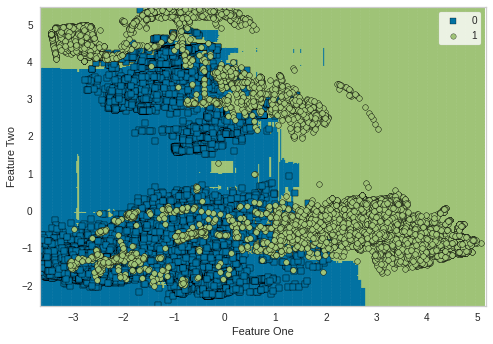

In [ ]:
plot_model(tuned_model_0,"boundary")

In [ ]:
predict_model(tuned_model_0)

Model  Accuracy  AUC  Recall   Prec.     F1
0  Random Forest Classifier    0.9991  1.0  0.9999  0.9982  0.999

service_csnet_ns  service_link  ...  Label  Score
0                   0.0           0.0  ...      0    1.0
1                   0.0           0.0  ...      1    1.0
2                   0.0           0.0  ...      1    1.0
3                   0.0           0.0  ...      0    1.0
4                   0.0           0.0  ...      0    1.0
...                 ...           ...  ...    ...    ...
37787               0.0           0.0  ...      0    1.0
37788               0.0           0.0  ...      1    1.0
37789               0.0           0.0  ...      1    1.0
37790               0.0           0.0  ...      1    1.0
37791               0.0           0.0  ...      0    1.0

[37792 rows x 66 columns]

In [ ]:
final = finalize_model(tuned_model_0)

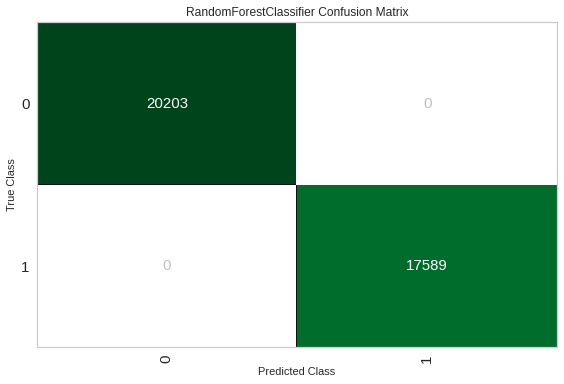

In [ ]:
plot_model(final,plot="confusion_matrix")#save=True)

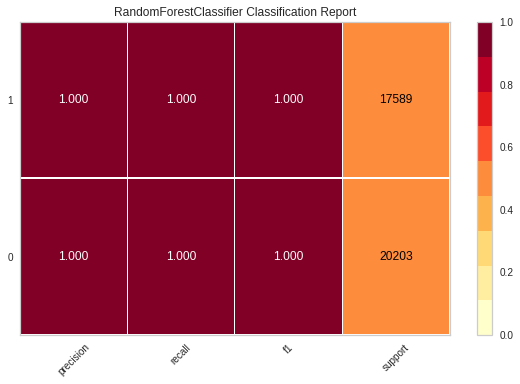

In [ ]:
plot_model(final,plot="class_report")#save=True)

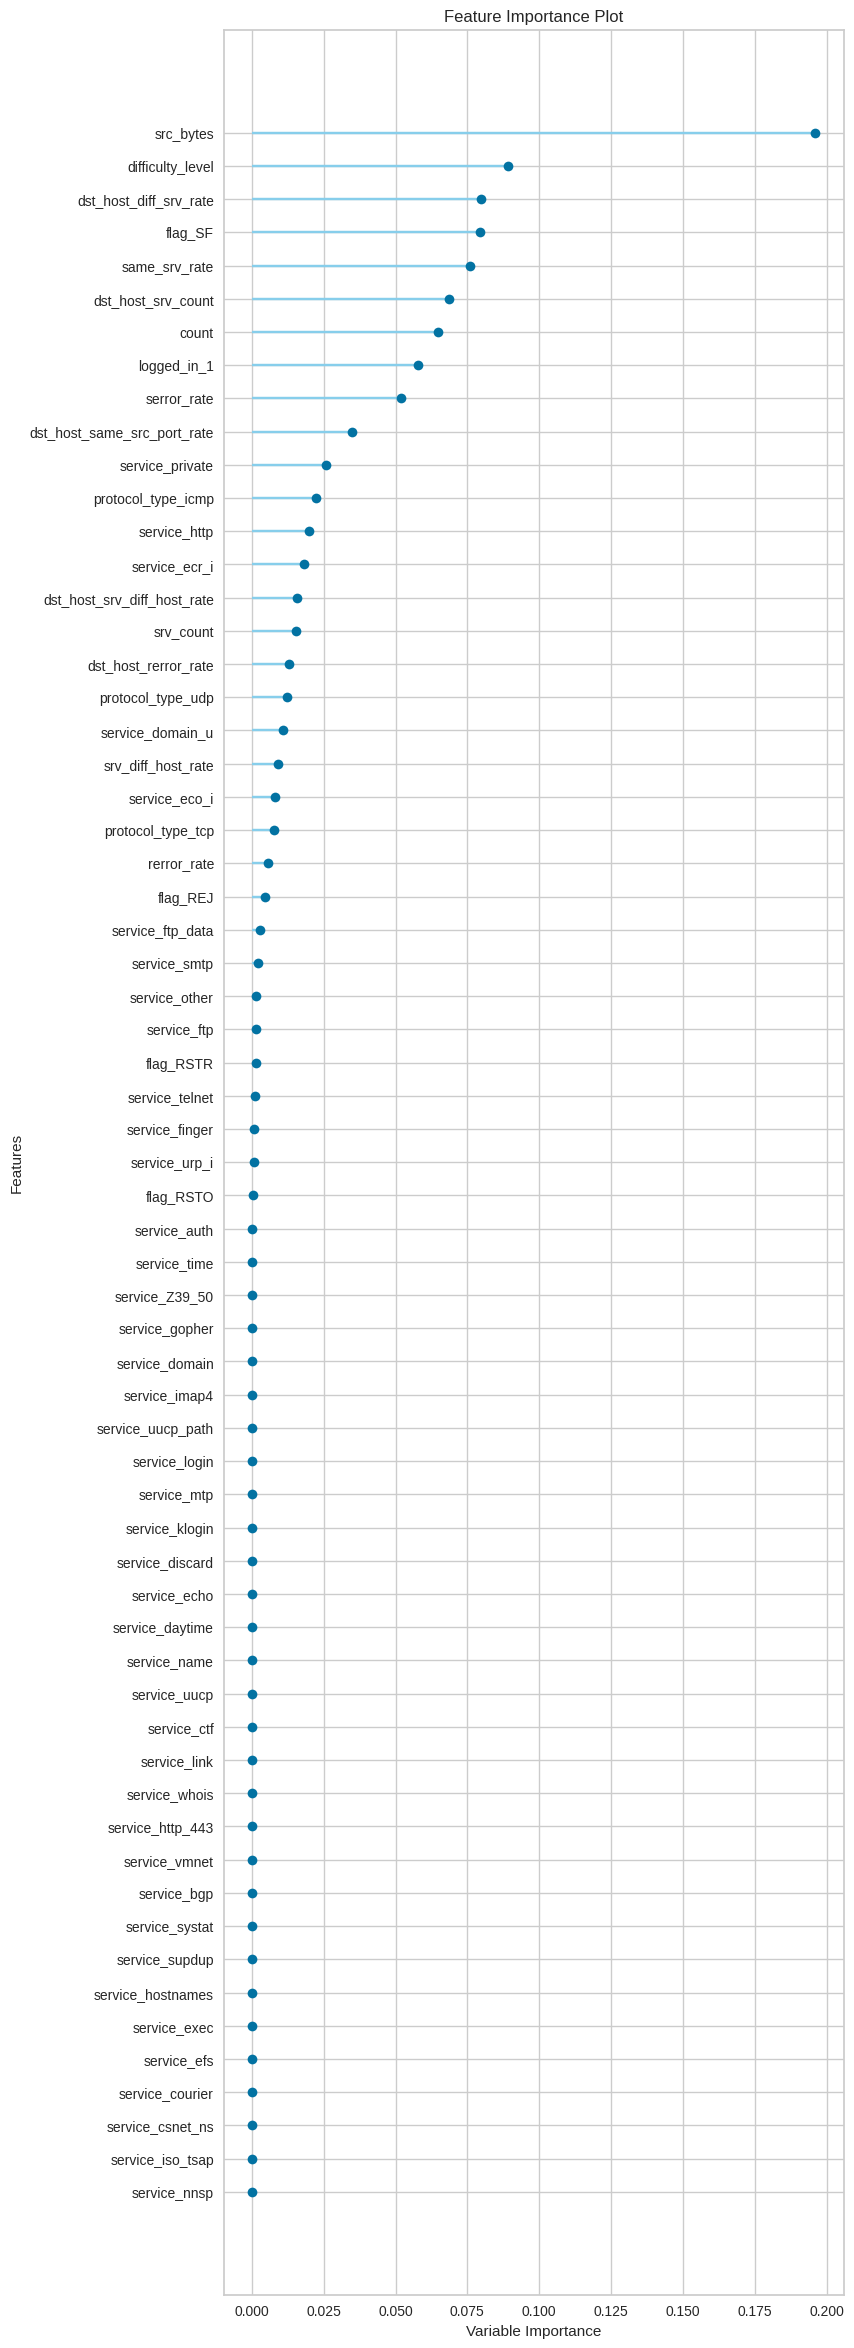

In [ ]:
plot_model(final,plot="feature_all")

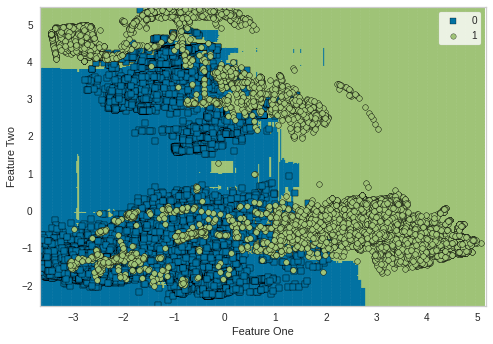

In [ ]:
plot_model(final,"boundary")

In [ ]:
save_model(final,"ids_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['protocol_type',
                                                             'flag'],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='attack_flag', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_n...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                 